In [2]:
from keras.datasets import boston_housing
%matplotlib inline
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch import optim
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
import math, random
torch.__version__

Using TensorFlow backend.


'1.3.1'

In [87]:
EPOCHES = 200

In [88]:
# load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [89]:
# normalization & change to tensor
mean = x_train.mean(axis = 0, keepdims=True)
std = x_train.std(axis = 0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

x_train_torch = torch.from_numpy(x_train).float()
x_test_torch = torch.from_numpy(x_test).float()
y_train_torch = torch.from_numpy(y_train.reshape(-1,1)).float()
y_test_torch = torch.from_numpy(y_test.reshape(-1,1)).float()

In [90]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = F.relu(self.fc3(x))     
        return out        

In [91]:
net = Net()
criteration = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())

583.2442016601562


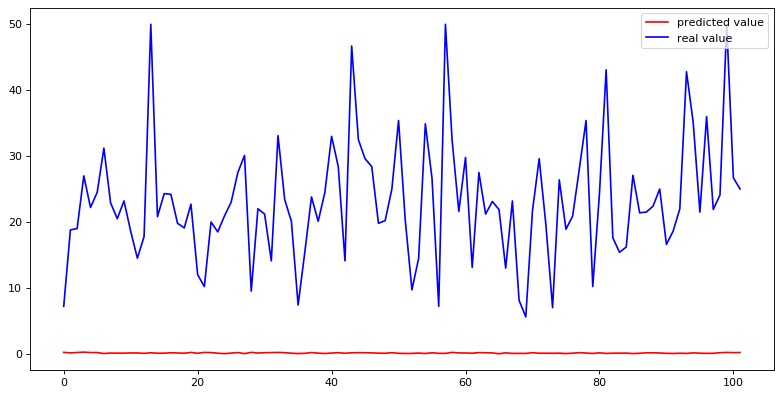

522.634521484375


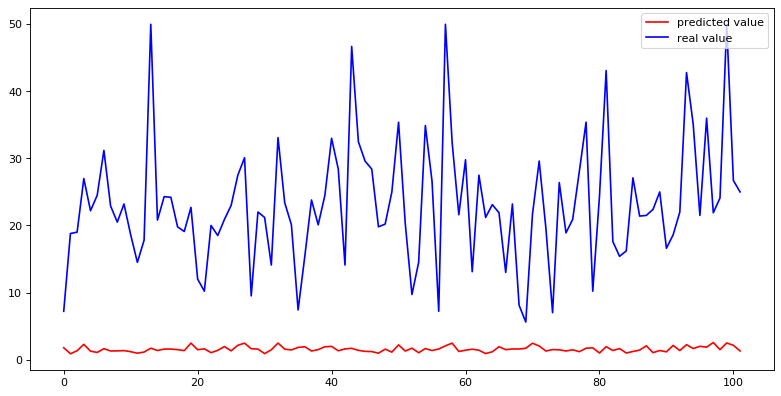

405.3812255859375


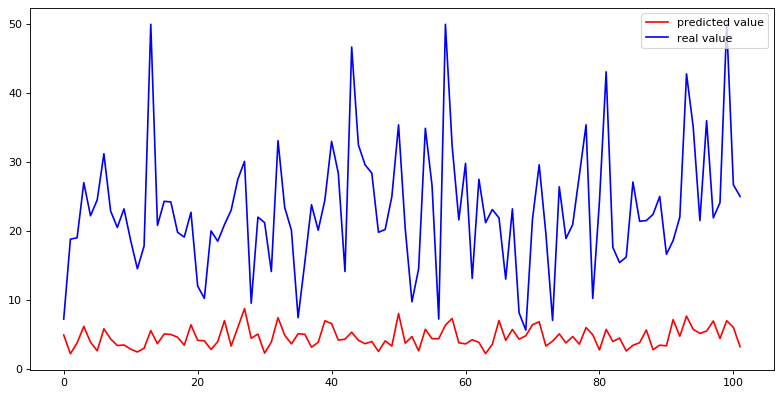

220.12625122070312


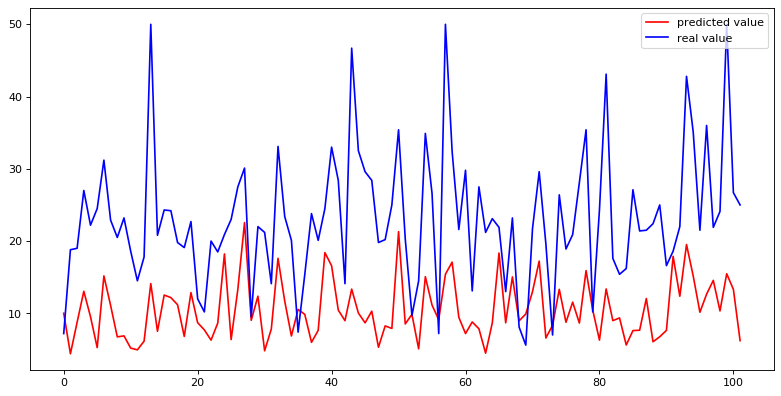

79.59991455078125


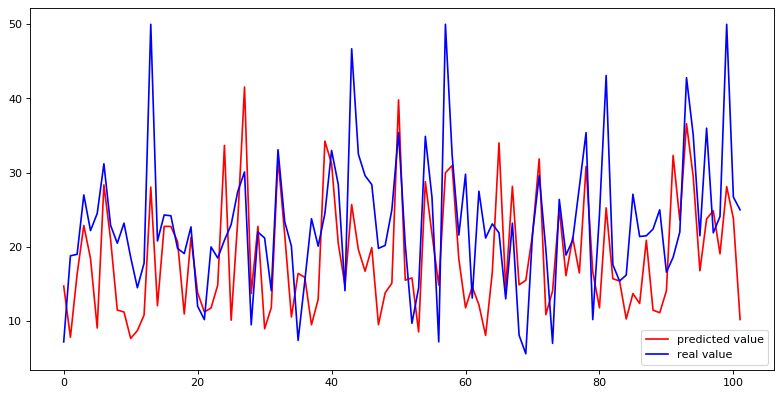

46.87055969238281


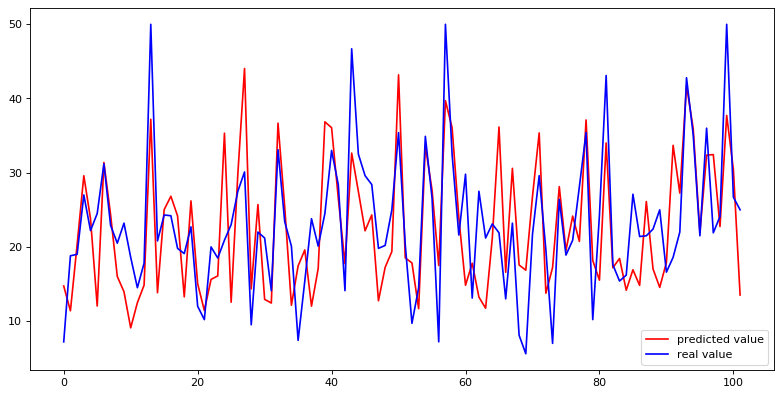

30.4094181060791


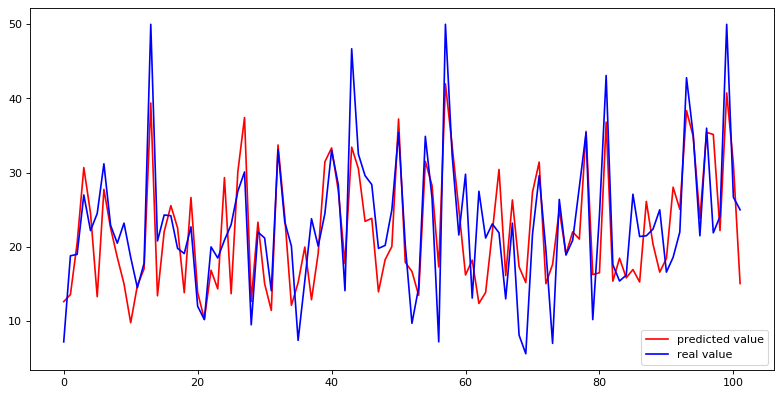

24.160606384277344


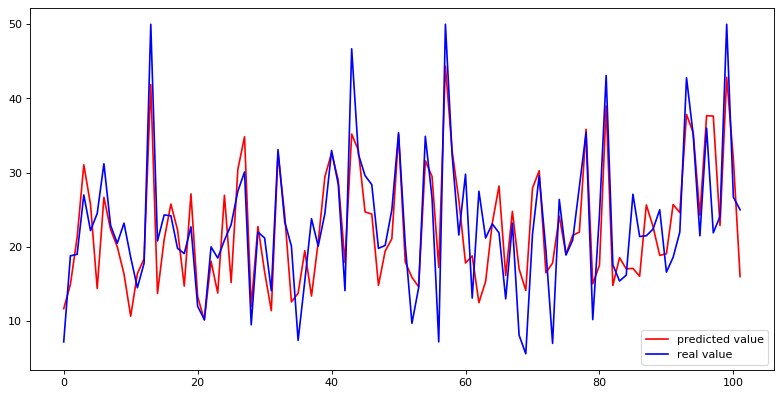

21.07581901550293


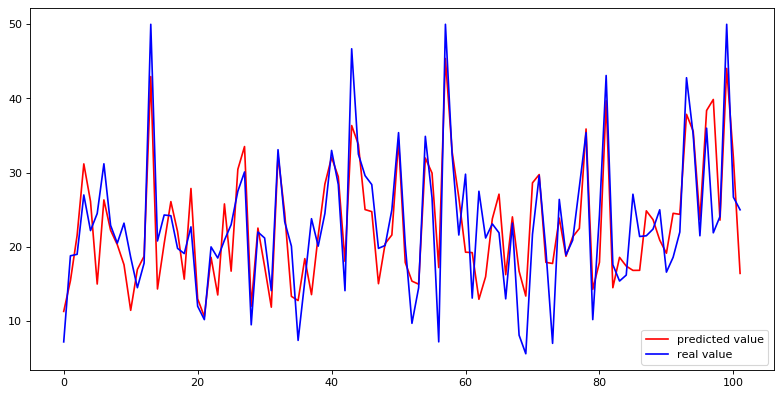

18.861181259155273


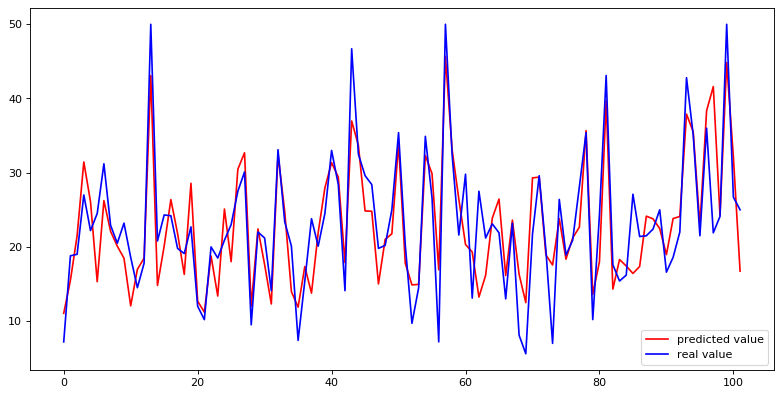

In [92]:
# train
net.train()
mse = []
for _ in range(EPOCHES):
    output = net(x_train_torch)
    loss = criteration(output,y_train_torch)
    mse.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if _ % 20 == 0:
        print(loss.item())
        draw()

In [75]:
#for i in range(len(mse)): mse[i] = round(mse[i],2)
#print(mse)

In [79]:
def draw():
    lenth = y_test.shape[0]
    net.eval()
    test_out = net(x_test_torch)
    plt.figure(figsize=(12,6),dpi=80)
    plt.plot(range(lenth), test_out.data, 'r-', label = 'predicted value')
    plt.plot(range(lenth), y_test, 'b-', label = 'real value')
    plt.legend(loc='best')
    plt.show()

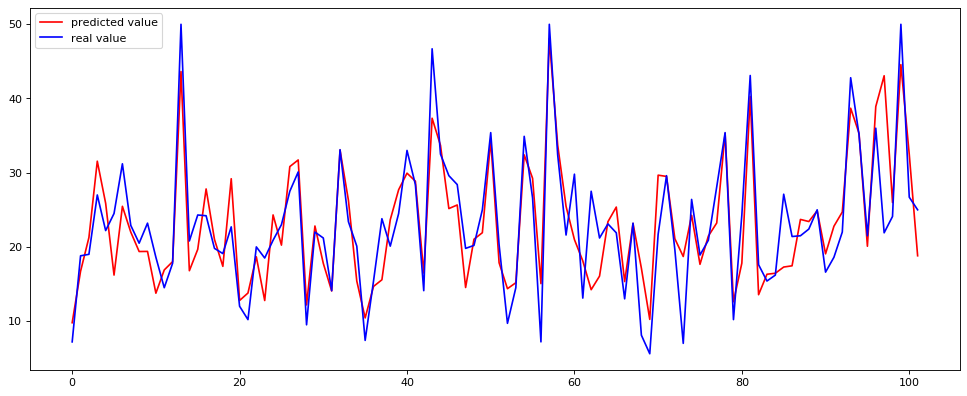